In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
from torchvision import transforms
import os

import glob
from PIL import Image
from tqdm import tqdm

In [2]:
os.listdir('E:/肝脏CT边缘分割/data/liver/liver/train/')

['000.png',
 '000_mask.png',
 '001.png',
 '001_mask.png',
 '002.png',
 '002_mask.png',
 '003.png',
 '003_mask.png',
 '004.png',
 '004_mask.png',
 '005.png',
 '005_mask.png',
 '006.png',
 '006_mask.png',
 '007.png',
 '007_mask.png',
 '008.png',
 '008_mask.png',
 '009.png',
 '009_mask.png',
 '010.png',
 '010_mask.png',
 '011.png',
 '011_mask.png',
 '012.png',
 '012_mask.png',
 '013.png',
 '013_mask.png',
 '014.png',
 '014_mask.png',
 '015.png',
 '015_mask.png',
 '016.png',
 '016_mask.png',
 '017.png',
 '017_mask.png',
 '018.png',
 '018_mask.png',
 '019.png',
 '019_mask.png',
 '020.png',
 '020_mask.png',
 '021.png',
 '021_mask.png',
 '022.png',
 '022_mask.png',
 '023.png',
 '023_mask.png',
 '024.png',
 '024_mask.png',
 '025.png',
 '025_mask.png',
 '026.png',
 '026_mask.png',
 '027.png',
 '027_mask.png',
 '028.png',
 '028_mask.png',
 '029.png',
 '029_mask.png',
 '030.png',
 '030_mask.png',
 '031.png',
 '031_mask.png',
 '032.png',
 '032_mask.png',
 '033.png',
 '033_mask.png',
 '034.png',
 '

In [8]:
def make_dataset(root):
    imgs = []
    labels=[]
    n = len(os.listdir(root)) // 2  #因为数据集中一套训练数据包含有训练图和mask图，所以要除2
    for i in range(n):
        img = os.path.join(root, "%03d.png" % i)
        mask = os.path.join(root, "%03d_mask.png" % i)
        imgs.append(img)
        labels.append(mask)
    return imgs,labels
root='E:/肝脏CT边缘分割/data/liver/liver/train/'
root_test='E:/肝脏CT边缘分割/data/liver/liver/val/'
train_imgs,train_labels=make_dataset(root)
test_imgs,test_labels=make_dataset(root_test)



In [6]:
train_imgs[0:5]


['E:/肝脏CT边缘分割/data/liver/liver/train/000.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train/001.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train/002.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train/003.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train/004.png']

In [7]:
train_labels[0:5]

['E:/肝脏CT边缘分割/data/liver/liver/train/000_mask.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train/001_mask.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train/002_mask.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train/003_mask.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train/004_mask.png']

In [16]:
im=Image.open('E:/肝脏CT边缘分割/data/liver/liver/train\\000_mask.png')
im_array=np.array(im)
np.max(im_array)

255

In [17]:
np.unique(im_array)

array([  0, 255], dtype=uint8)

In [9]:
class LiverDataset(data.Dataset):
    def __init__(self,img,mask,transformer):
        self.img=img
        self.mask=mask
        self.transformer=transformer
    def __getitem__(self,index):
        img=self.img[index]
        mask=self.mask[index]
        
        img_open=Image.open(img)
        img_tensor=self.transformer(img_open)
        
        mask_open=Image.open(mask)
        mask_tensor=self.transformer(mask_open)

        mask_tensor=torch.squeeze(mask_tensor).type(torch.long)
        
        return img_tensor,mask_tensor
    def __len__(self):
        return len(self.img)

In [10]:
train_transforms= transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),  # -> [0,1],
])

test_transforms = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),  # -> [0,1]
])

In [11]:
train_data=LiverDataset(train_imgs,train_labels,train_transforms)
test_data=LiverDataset(test_imgs,test_labels,test_transforms)

In [12]:
dl_train=data.DataLoader(train_data,batch_size=16,shuffle=True)
dl_test=data.DataLoader(test_data,batch_size=16,shuffle=True)

(128, 128, 3)

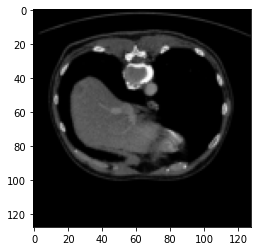

In [13]:
img,lable= next(iter(dl_train))
img.shape
a=img[0].permute(1,2,0).numpy()
plt.imshow(a[::1])
a.shape

In [14]:
img,lable= next(iter(dl_train))
lable.shape

torch.Size([16, 128, 128])

In [15]:
torch.max(lable[0])

tensor(1)

In [39]:
import torchvision
import segmentation_models_pytorch as smp
model = smp.PSPNet(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    #encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=2,                      # model output channels (number of classes in your dataset)
)


In [18]:
img,lable= next(iter(dl_train))
img=img.to('cuda')
model.to('cuda')
pred=model(img)
pred.shape

NameError: name 'model' is not defined

In [ ]:
import torch
if torch.cuda.is_available():
    model.to('cuda')

In [ ]:
from torch.optim import lr_scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optim, step_size=7, gamma=0.1)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
from tqdm import tqdm
def fit(epoch, model, trainloader, testloader):
    correct = 0
    total = 0
    running_loss = 0
    epoch_iou = []
    
    model.train()
    for x, y in tqdm(testloader):
 
        x, y = x.to('cuda'), y.to('cuda')
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
            
            intersection = torch.logical_and(y, y_pred)
            union = torch.logical_or(y, y_pred)
            batch_iou = torch.sum(intersection) / torch.sum(union)
            epoch_iou.append(batch_iou.item())
            
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / (total*256*256)
        
        
    test_correct = 0
    test_total = 0
    test_running_loss = 0 
    epoch_test_iou = []
    
    model.eval()
    with torch.no_grad():
        for x, y in tqdm(testloader):

            x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()
            
            intersection = torch.logical_and(y, y_pred)
            union = torch.logical_or(y, y_pred)
            batch_iou = torch.sum(intersection) / torch.sum(union)
            epoch_test_iou.append(batch_iou.item())
            
    
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / (test_total*256*256)
    
    
    print('epoch: ', epoch, 
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'IOU:', round(np.mean(epoch_iou), 3),
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3),
           'test_iou:', round(np.mean(epoch_test_iou), 3)
             )
        
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [19]:
len(train_data)

400

In [52]:
epochs =50 

In [53]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model,
                                                                 dl_train,
                                                                 dl_test)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  0 loss：  0.002 accuracy: 0.144 IOU: 0.191 test_loss：  0.02 test_accuracy: 0.235 test_iou: 0.0


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  1 loss：  0.0 accuracy: 0.242 IOU: 0.555 test_loss：  0.011 test_accuracy: 0.236 test_iou: 0.077


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.81it/s]

epoch:  2 loss：  0.0 accuracy: 0.246 IOU: 0.758 test_loss：  0.007 test_accuracy: 0.244 test_iou: 0.592



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  3 loss：  0.0 accuracy: 0.248 IOU: 0.853 test_loss：  0.006 test_accuracy: 0.246 test_iou: 0.745


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  4 loss：  0.0 accuracy: 0.248 IOU: 0.857 test_loss：  0.005 test_accuracy: 0.246 test_iou: 0.733


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.05it/s]

epoch:  5 loss：  0.0 accuracy: 0.248 IOU: 0.869 test_loss：  0.004 test_accuracy: 0.246 test_iou: 0.731



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.31it/s]

epoch:  6 loss：  0.0 accuracy: 0.248 IOU: 0.822 test_loss：  0.003 test_accuracy: 0.247 test_iou: 0.813



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  7 loss：  0.0 accuracy: 0.248 IOU: 0.884 test_loss：  0.004 test_accuracy: 0.246 test_iou: 0.801


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  8 loss：  0.0 accuracy: 0.248 IOU: 0.883 test_loss：  0.003 test_accuracy: 0.247 test_iou: 0.841


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  9 loss：  0.0 accuracy: 0.248 IOU: 0.88 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.839


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.87it/s]

epoch:  10 loss：  0.0 accuracy: 0.248 IOU: 0.867 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.85



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  11 loss：  0.0 accuracy: 0.248 IOU: 0.868 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.875


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  12 loss：  0.0 accuracy: 0.248 IOU: 0.903 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.882


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.70it/s]


epoch:  13 loss：  0.0 accuracy: 0.248 IOU: 0.905 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.868


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  14 loss：  0.0 accuracy: 0.249 IOU: 0.895 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.832


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.87it/s]

epoch:  15 loss：  0.0 accuracy: 0.248 IOU: 0.89 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.837



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  16 loss：  0.0 accuracy: 0.248 IOU: 0.9 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.889


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.64it/s]

epoch:  17 loss：  0.0 accuracy: 0.249 IOU: 0.902 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.912



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  18 loss：  0.0 accuracy: 0.249 IOU: 0.913 test_loss：  0.001 test_accuracy: 0.248 test_iou: 0.89


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  19 loss：  0.0 accuracy: 0.248 IOU: 0.909 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.901


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  20 loss：  0.0 accuracy: 0.249 IOU: 0.905 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.866


 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.41it/s]

epoch:  21 loss：  0.0 accuracy: 0.249 IOU: 0.905 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.897


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  22 loss：  0.0 accuracy: 0.249 IOU: 0.907 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.919


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  23 loss：  0.0 accuracy: 0.249 IOU: 0.913 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.918


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  24 loss：  0.0 accuracy: 0.249 IOU: 0.91 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.894


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.93it/s]


epoch:  25 loss：  0.0 accuracy: 0.249 IOU: 0.922 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.855


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  26 loss：  0.0 accuracy: 0.249 IOU: 0.909 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.854


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  27 loss：  0.0 accuracy: 0.249 IOU: 0.904 test_loss：  0.002 test_accuracy: 0.248 test_iou: 0.864


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  28 loss：  0.0 accuracy: 0.249 IOU: 0.895 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.923


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.93it/s]

epoch:  29 loss：  0.0 accuracy: 0.249 IOU: 0.918 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.921



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.36it/s]

epoch:  30 loss：  0.0 accuracy: 0.249 IOU: 0.886 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.917



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  31 loss：  0.0 accuracy: 0.249 IOU: 0.912 test_loss：  0.001 test_accuracy: 0.248 test_iou: 0.89


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.81it/s]

epoch:  32 loss：  0.0 accuracy: 0.249 IOU: 0.917 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.905



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.99it/s]

epoch:  33 loss：  0.0 accuracy: 0.249 IOU: 0.915 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.936



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  34 loss：  0.0 accuracy: 0.249 IOU: 0.927 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.927


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  35 loss：  0.0 accuracy: 0.249 IOU: 0.921 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.936


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.26it/s]

epoch:  36 loss：  0.0 accuracy: 0.249 IOU: 0.928 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.927



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  37 loss：  0.0 accuracy: 0.249 IOU: 0.922 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.923


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  38 loss：  0.0 accuracy: 0.249 IOU: 0.923 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.935


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  39 loss：  0.0 accuracy: 0.249 IOU: 0.928 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.938


 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  6.67it/s]

epoch:  40 loss：  0.0 accuracy: 0.249 IOU: 0.927 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.939


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  41 loss：  0.0 accuracy: 0.249 IOU: 0.926 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.929


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  42 loss：  0.0 accuracy: 0.249 IOU: 0.921 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.918


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  43 loss：  0.0 accuracy: 0.249 IOU: 0.926 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.936


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  44 loss：  0.0 accuracy: 0.249 IOU: 0.93 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.941


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  45 loss：  0.0 accuracy: 0.249 IOU: 0.936 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.93


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.49it/s]

epoch:  46 loss：  0.0 accuracy: 0.249 IOU: 0.928 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.935



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  47 loss：  0.0 accuracy: 0.249 IOU: 0.928 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.915


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

epoch:  48 loss：  0.0 accuracy: 0.249 IOU: 0.924 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.926


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13.99it/s]

epoch:  49 loss：  0.0 accuracy: 0.249 IOU: 0.93 test_loss：  0.001 test_accuracy: 0.249 test_iou: 0.931


In [ ]:
my_model = Net
PATH='./data/checkpoint/2_train_acc_0.99_test_acc_0.949.pth'
my_model.load_state_dict(torch.load(PATH))

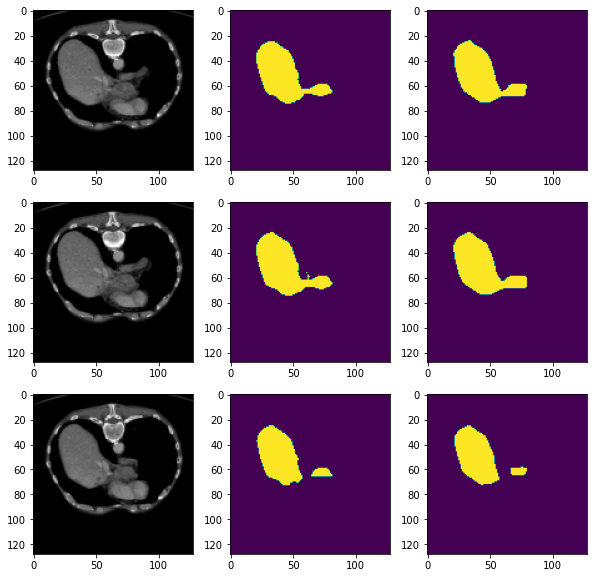

In [54]:
image, mask = next(iter(dl_test))
image=image.to('cuda')
model.eval()
pred_mask = model(image)
 
mask=torch.squeeze(mask)
mask.shape
pred_mask
pred_mask.shape
pred_mask=pred_mask.cpu()
num=3
plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    plt.imshow(mask[i].cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())

In [ ]:
pred_mask
pred_mask.shape
pred_mask=pred_mask.cpu()

In [ ]:
num=3
plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    plt.imshow(mask[i].cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())

In [ ]:
image, mask = next(iter(dl_test))
mask
plt.figure(figsize=(10, 10))
mask[1]
image=image*255
plt.imshow(image[1].permute(1,2,0).cpu().numpy())

In [ ]:
image, mask = next(iter(dl_test))
my_model=my_model.cpu()
pred_mask = my_model(image)

plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    image=image/255
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    mask=mask/255
    plt.imshow(mask[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())